In [38]:
# Data manupulation
import pandas as pd

# Numerical computation
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

# Data preprocessing
from datetime import datetime

In [39]:
covid_df = pd.read_csv('data/covid_19_india.csv')
vaccine_df = pd.read_csv('data/covid_vaccine_statewise.csv')

covid_df.head(3)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2


In [40]:
# Modifyting the csv file to make it more readable
covid_df.rename(columns={"Confirmed": "Reported"}, inplace=True)
covid_df.rename(columns={"State/UnionTerritory": "Region"}, inplace=True)

# To remove unnecessary columns and converting date column to datetime format
try:
    covid_df.drop(["Sno", "Time", "ConfirmedIndianNational", "ConfirmedForeignNational"], axis = 1, inplace=True)  
except:
    print("Run All to do so!")
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format='%Y-%m-%d')

# Repositioning the columns
new_cols = ["Date","Region","Reported","Cured", "Deaths"]
covid_df = covid_df[new_cols]

covid_df.head(3)

,Date,Region,Reported,Cured,Deaths
0,2020-01-30,Kerala,1,0,0
1,2020-01-31,Kerala,1,0,0
2,2020-02-01,Kerala,2,0,0


In [41]:
# To get basic info about columns and rows
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      18110 non-null  datetime64[ns]
 1   Region    18110 non-null  object        
 2   Reported  18110 non-null  int64         
 3   Cured     18110 non-null  int64         
 4   Deaths    18110 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 707.5+ KB


In [42]:
# To get compenents of box-plot
covid_df.describe()

,Date,Reported,Cured,Deaths
count,18110,1.811000e+04,1.811000e+04,18110.000000
mean,2020-11-30 21:49:50.127001344,3.010314e+05,2.786375e+05,4052.402264
min,2020-01-30 00:00:00,0.000000e+00,0.000000e+00,0.000000
25%,2020-07-26 00:00:00,4.376750e+03,3.360250e+03,32.000000
50%,2020-12-03 00:00:00,3.977350e+04,3.336400e+04,588.000000
75%,2021-04-08 00:00:00,3.001498e+05,2.788698e+05,3643.750000
max,2021-08-11 00:00:00,6.363442e+06,6.159676e+06,134201.000000
std,NaN,6.561489e+05,6.148909e+05,10919.076411


In [43]:
# To get the number of active cases in a new column
covid_df["Active"] = covid_df["Reported"] - covid_df["Cured"] - covid_df["Deaths"]
covid_df["Cure Rate"] = covid_df["Cured"] / covid_df["Reported"] * 100

covid_df.tail(3)

,Date,Region,Reported,Cured,Deaths,Active,Cure Rate
18107,2021-08-11,Uttarakhand,342462,334650,7368,444,97.718871
18108,2021-08-11,Uttar Pradesh,1708812,1685492,22775,545,98.635309
18109,2021-08-11,West Bengal,1534999,1506532,18252,10215,98.145471


In [44]:
# Creating a pivot table to get the total number of cases in each region
covid_pivot = pd.pivot_table(covid_df, values=['Reported', 'Cured' , 'Deaths' , 'Active', 'Cure Rate'], index=['Region'], aggfunc=sum)
covid_pivot = covid_pivot[['Reported', 'Cured' , 'Deaths' , 'Active', 'Cure Rate']]

covid_pivot = covid_pivot.sort_values(by=['Reported'], ascending=False).reset_index()
covid_pivot.head(10).style.background_gradient(cmap='Blues')

,Region,Reported,Cured,Deaths,Active,Cure Rate
0,Maharashtra,1121491467,1018765039,23737432,78988996,37425.368599
1,Karnataka,485970693,441844360,6053762,38072571,38022.414789
2,Kerala,458906023,420174235,1888177,36843611,39871.799874
3,Tamil Nadu,431928644,404095807,5916658,21916179,40836.073786
4,Andhra Pradesh,392432753,370426530,2939367,19066856,39782.018690
5,Uttar Pradesh,312625843,291479351,4143450,17003042,40217.197237
6,Delhi,287227765,273419887,4943294,8864584,41189.096718
7,West Bengal,263107876,247515102,3846989,11745785,39374.338938
8,Chhattisgarh,163776262,151609364,2063920,10102978,40119.951451
9,Rajasthan,162369656,150356820,1473089,10539747,41121.158501


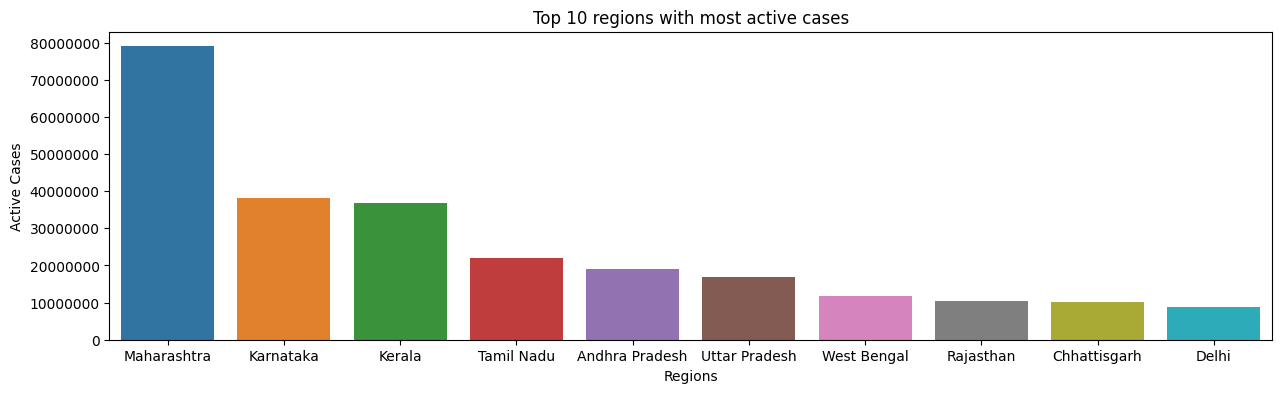

In [45]:
# Bar chat to display top 10 regions with most number of cases
top_active_cases = covid_df.groupby(by = 'Region')[['Active']].sum()
top_active_cases = top_active_cases.sort_values(by = ['Active'], ascending = False).reset_index()

fig = plt.figure(figsize=(15, 4))
plt.title("Top 10 regions with most active cases")
ax = sns.barplot(data = top_active_cases.iloc[:10], y = "Active", x = "Region")
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

plt.xlabel("Regions")
plt.ylabel("Active Cases")
plt.show()

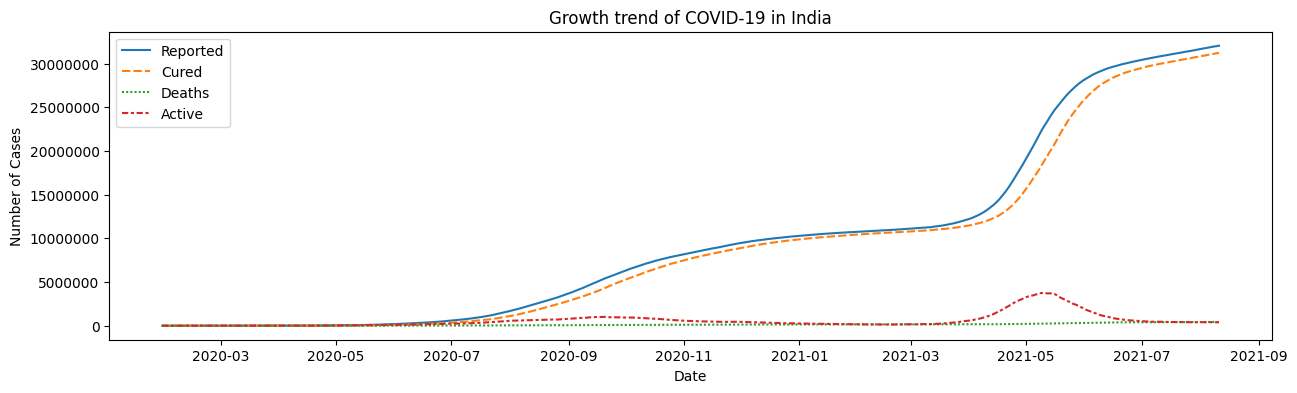

In [46]:
# Grow trend to display the growth of COVID-19 in India

fig = plt.figure(figsize=(15, 4))
plt.title("Growth trend of COVID-19 in India")
ax = sns.lineplot(data = covid_df.groupby(by = 'Date')[['Reported', 'Cured' , 'Deaths' , 'Active']].sum())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.show()

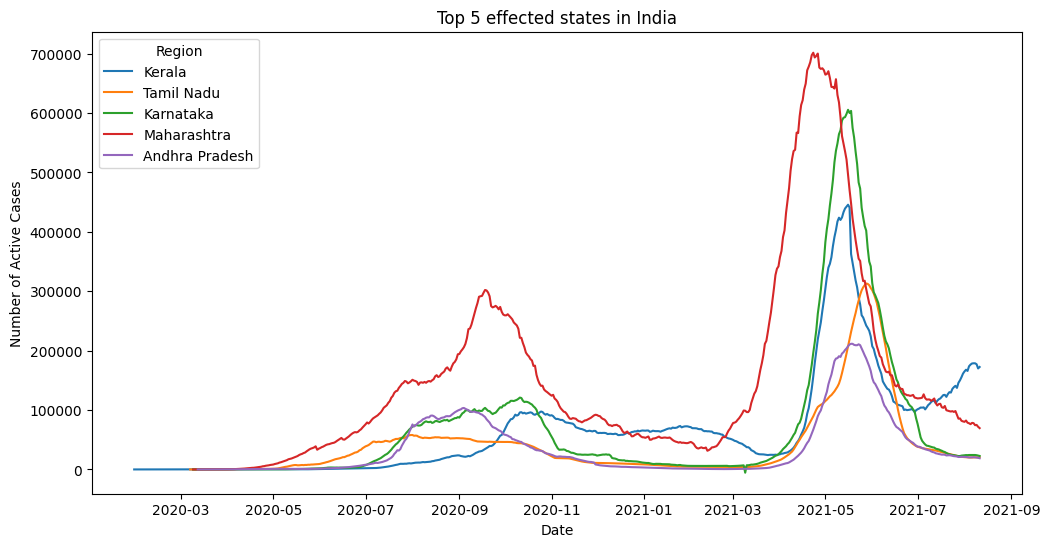

In [47]:
# Grow trend to display top 5 effected states in India
fig = plt.figure(figsize=(12, 6))
ax = sns.lineplot( data = covid_df[covid_df['Region'].isin(['Maharashtra', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Andhra Pradesh'])], x = 'Date', y= 'Active', hue = 'Region')

plt.title("Top 5 effected states in India")
plt.xlabel("Date")
plt.ylabel("Number of Active Cases")
plt.show()

In [48]:
vaccine_df.rename(columns={"Updated On": "Date", "State" : "Region"}, inplace=True)
vaccine_df['Date'] = pd.to_datetime(vaccine_df['Date'], format='%d/%m/%Y')
try:
    vaccine_df = vaccine_df.sort_values( by = 'Date', ascending = True ).reset_index()
except:
    print("Run All to do so!")
vaccine_df.head(5)

,index,Date,Region,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,0,2021-01-16,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,4665,2021-01-16,Manipur,181.0,10.0,10.0,181.0,0.0,112.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.0
2,1272,2021-01-16,Chandigarh,120.0,5.0,5.0,120.0,0.0,94.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0
3,7209,2021-01-16,Uttar Pradesh,2212.0,380.0,327.0,2212.0,0.0,1341.0,871.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2212.0
4,636,2021-01-16,Arunachal Pradesh,81.0,10.0,9.0,81.0,0.0,40.0,41.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0


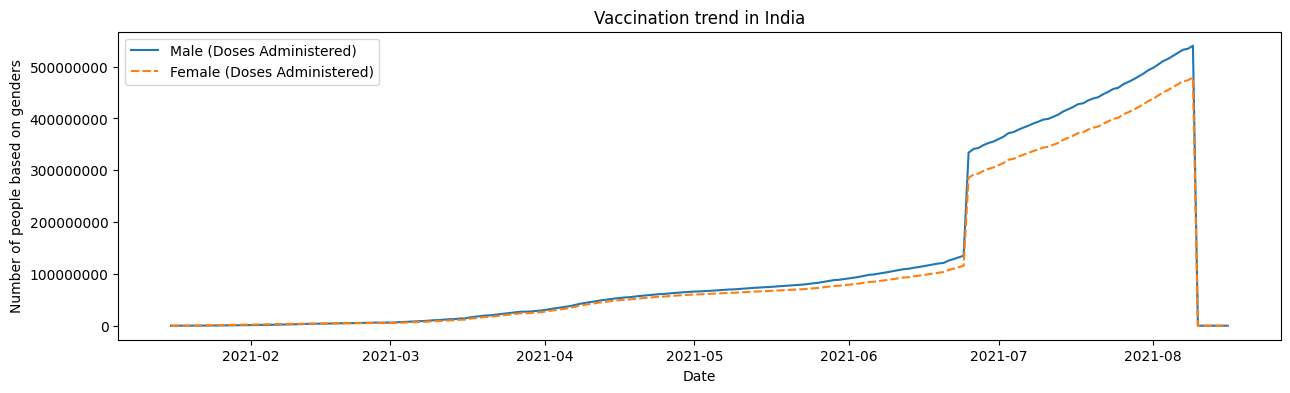

In [49]:
# Grow trend to vaccinate people based on genders in India

fig = plt.figure(figsize=(15, 4))
plt.title("Vaccination trend in India")
ax = sns.lineplot(data = vaccine_df.groupby(by = 'Date')[['Male (Doses Administered)', 'Female (Doses Administered)']].sum())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

plt.xlabel("Date")
plt.ylabel("Number of people based on genders")
plt.show()

In [50]:
male = vaccine_df['Male (Doses Administered)'].sum()
female = vaccine_df['Female (Doses Administered)'].sum()
px.pie( names = ["Male", "Female"], values= [male, female], title= "Male & Female vaccination" )

In [51]:
# Removing records of India from the dataset
vaccine = vaccine_df[ vaccine_df['Region'] != 'India' ]
vaccine.head(3)

,index,Date,Region,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
1,4665,2021-01-16,Manipur,181.0,10.0,10.0,181.0,0.0,112.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.0
2,1272,2021-01-16,Chandigarh,120.0,5.0,5.0,120.0,0.0,94.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0
3,7209,2021-01-16,Uttar Pradesh,2212.0,380.0,327.0,2212.0,0.0,1341.0,871.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2212.0


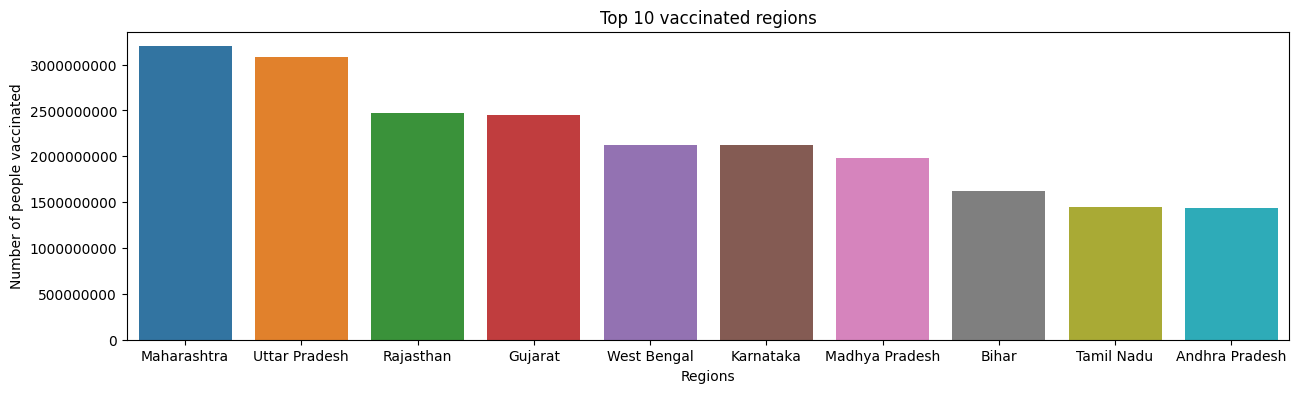

In [60]:
# Displaying most vaccinated regions

vaccinated_regions = vaccine.groupby(by = 'Region')[['Male (Doses Administered)', 'Female (Doses Administered)']].sum().reset_index()
vaccinated_regions['Total'] = vaccinated_regions['Male (Doses Administered)'] + vaccinated_regions['Female (Doses Administered)']
vaccinated_regions = vaccinated_regions.sort_values(by = ['Total'], ascending = False).reset_index()

fig = plt.figure(figsize=(15, 4))
plt.title("Top 10 vaccinated regions")
ax = sns.barplot(data = vaccinated_regions.iloc[:10], x = 'Region', y = 'Total')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

plt.xlabel("Regions")
plt.ylabel("Number of people vaccinated")

plt.show()